<a href="https://colab.research.google.com/github/31indianaSKKU/SIS_Sports_BDA_SML/blob/main/SML_MLP_WholeProcess_Boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multi-layer Perceptron

Multi-layer Perceptron (MLP)은 인공신경망(Artificial Neural Network, ANN)의 한 종류로, 여러 개의 레이어로 구성된 퍼셉트론입니다.


보스턴 주택가격 데이터셋에서 '저렴한 주택'과 '비싼 주택'을 분류하는 문제를 MLP를 통해 해결해 봅시다.


**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

It contains 14 features described as follows:

CRIM: 도시별 인구 1인당 범죄율

ZN: 25,000 평방피트를 초과하는 거주지역 비율

INDUS: 도시별 비소매 상업지역 면적 비율

CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치한 경우는 1, 아니면 0)

NOX: 일산화질소 농도 (단위: 파트 퍼 10백만)

RM: 주택 1가구당 평균 방의 개수

AGE: 1940년 이전에 건축된 주택의 비율

DIS: 5개 보스턴 직업센터까지의 접근성 지수

RAD: 방사형 도로까지의 접근성 지수

TAX: 10,000 달러당 전체 가치 재산세율

PTRATIO: 도시별 학생/교사 비율

B: 도시별 흑인 인구 비율 (1000(Bk - 0.63)^2, 여기서 Bk는 흑인 인구 비율)

LSTAT: 인구 중 하위 계층 비율

MEDV: 주택의 중앙값 (단위: 천 달러)

# Loading the Data


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data = pd.DataFrame(data_boston, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
#x = x[['AGE']]

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data['MEDV'] = target

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


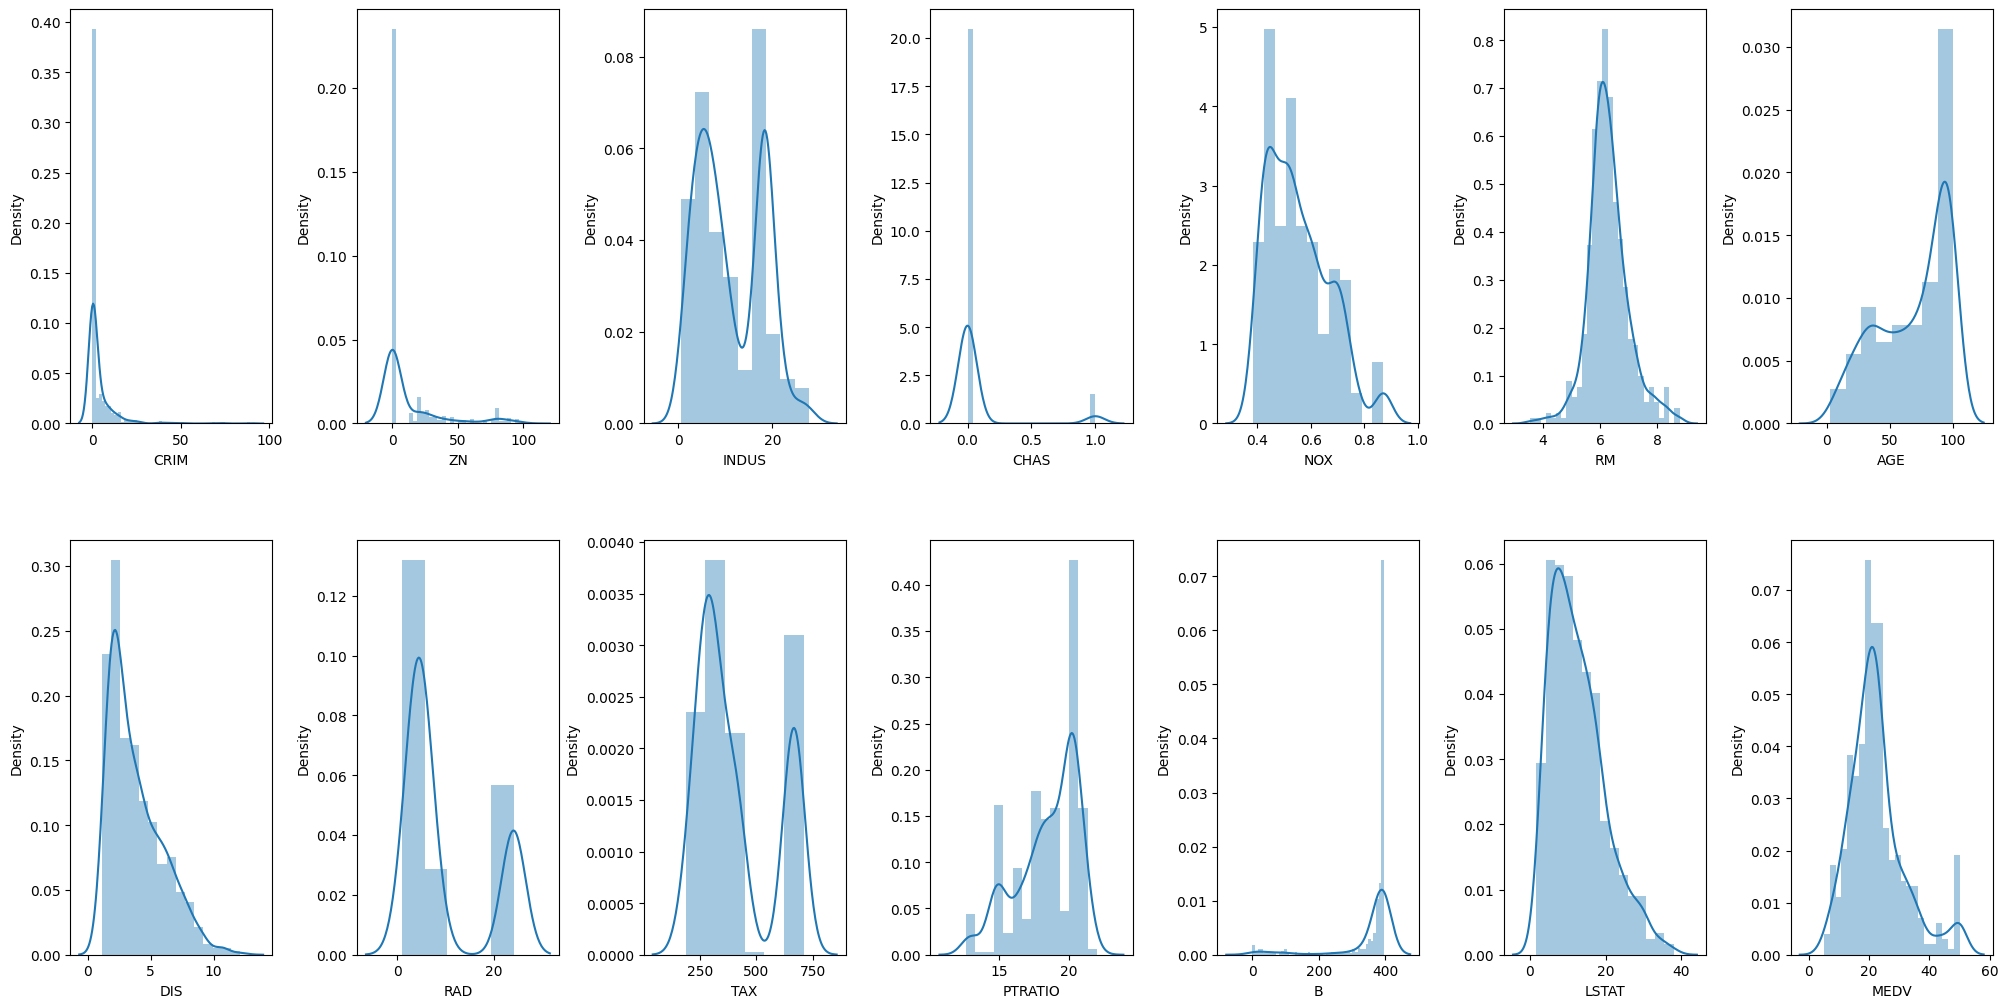

In [ ]:
# 각 Column 별 데이터의 분포를 살펴봅시다
# sns.distplot을 이용하여 데이터 분포에 대한 히스토그램과 커널 밀도 추정(Kernel Density Estimation, KDE) 그래프 그려보기
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

히스토그램을 통해서 데이터 분포를 살펴보면 CRIM, ZN, B 열은 매우 skew 된 분포를 보이는 것을 알 수 있습니다.

주택의 중앙값(MEDV)는 정규 분포를 보입니다.

In [ ]:
# 데이터가 범주형 데이터가 아니기 때문에 중앙값을 기준으로 범주를 나눕니다.
median_value = data['MEDV'].median()

# 범주형 변수로 변환합니다.
data['category'] = pd.cut(data['MEDV'], bins=[-np.inf, median_value, np.inf], labels=['Cheap', 'Expensive'])

# 변환된 범주형 종속 변수를 확인합니다.
print(data[['MEDV', 'category']].head())

   MEDV   category
0  24.0  Expensive
1  21.6  Expensive
2  34.7  Expensive
3  33.4  Expensive
4  36.2  Expensive


In [ ]:
# 데이터를 확인해보면 마지막 열에 category가 생긴 것을 볼 수 있다.
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,category
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Expensive
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Expensive
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,Expensive
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,Cheap
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,Expensive
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,Expensive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# 독립 변수와 종속 변수를 준비합니다.
X = data.drop(['MEDV', 'category'], axis=1)
y = data['category']

In [ ]:
np.shape(X), np.shape(y)

((506, 13), (506,))

In [ ]:
# 훈련 데이터와 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 나뉜 데이터 확인
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((404, 13), (102, 13), (404,), (102,))

In [ ]:
np.min(np.array(X_train)), np.max(np.array(X_train))

(0.0, 711.0)

In [ ]:
# 데이터 정규화
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
np.min(X_train), np.max(X_train)

(-3.892248541744519, 9.630688843769592)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 레이블을 원-핫 인코딩 형태로 변환합니다.
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)

In [ ]:
y_train_encoded[0]

0

In [ ]:
y_train_onehot[0]


array([1., 0.], dtype=float32)

In [ ]:
# Keras를 사용하여 MLP 모델을 구성합니다.
# 레이어를 추가해보거나 바꿔보면서 모델의 성능이 달라지는지 확인해보세요

model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

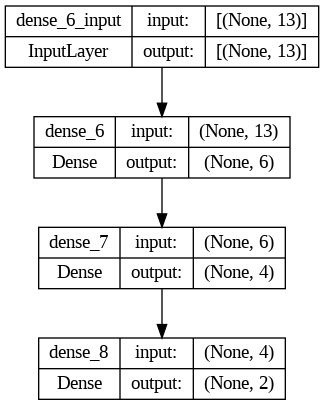

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# 모델을 컴파일하고 훈련
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=100, batch_size=32)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.6455 - accuracy: 0.5891 - val_loss: 0.6825 - val_accuracy: 0.5784
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.6238 - val_loss: 0.6611 - val_accuracy: 0.6078
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6093 - accuracy: 0.6881 - val_loss: 0.6440 - val_accuracy: 0.6667
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.7079 - val_loss: 0.6276 - val_accuracy: 0.7353
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.7649 - val_loss: 0.6133 - val_accuracy: 0.8039
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.7896 - val_loss: 0.6003 - val_accuracy: 0.8137
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5565 - accuracy: 0.7995 - val_loss: 0.5865 - val_accuracy: 0.8235
Epoch 8/100


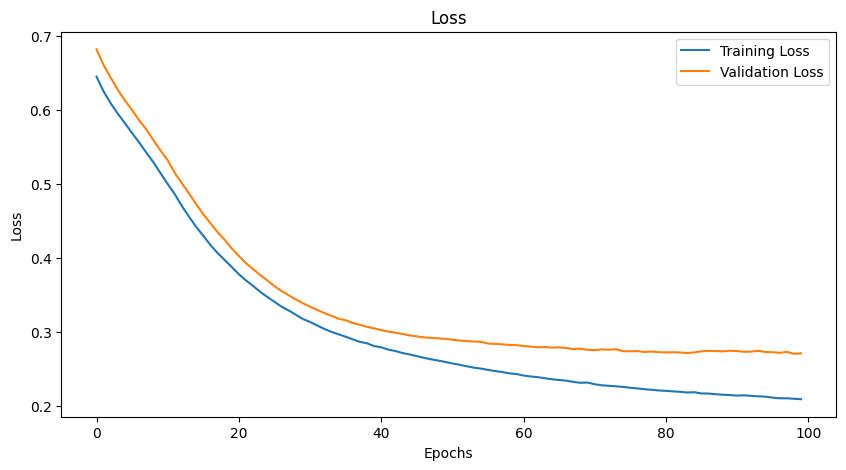

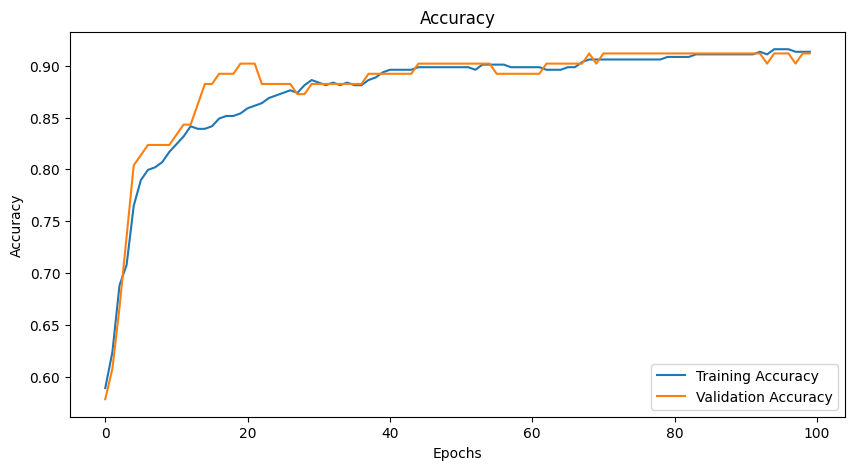

In [ ]:
# 손실 그래프
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# 정확도 그래프
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

In [ ]:
# 모델의 성능을 평가
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print("\nTest loss:", loss)
print("Test accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.9118

Test loss: 0.2715810239315033
Test accuracy: 0.9117646813392639


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.92      0.86      0.89        42

    accuracy                           0.91       102
   macro avg       0.91      0.90      0.91       102
weighted avg       0.91      0.91      0.91       102



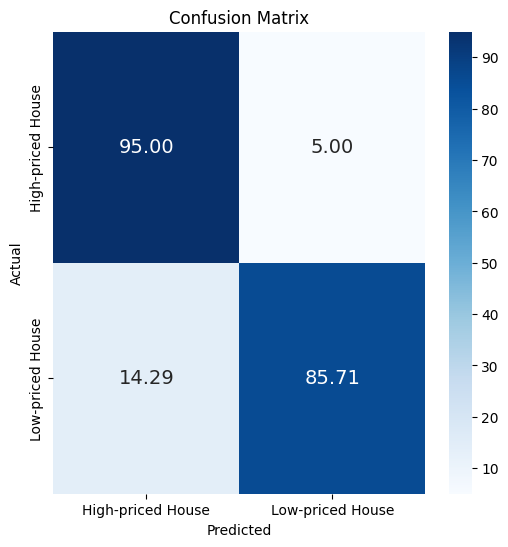

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred)
# 각 원소를 백분율로 변환
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 6))
class_name = ['High-priced House', 'Low-priced House']
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=True, xticklabels=class_name, yticklabels=class_name, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Epoch 변경 100->50
# 모델을 컴파일하고 훈련
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 3s 44ms/step - loss: 0.2101 - accuracy: 0.9134 - val_loss: 0.2724 - val_accuracy: 0.9020
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.2088 - accuracy: 0.9134 - val_loss: 0.2730 - val_accuracy: 0.9118
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.2080 - accuracy: 0.9134 - val_loss: 0.2711 - val_accuracy: 0.9118
Epoch 4/50
13/13 [==============================] - 0s 13ms/step - loss: 0.2087 - accuracy: 0.9134 - val_loss: 0.2705 - val_accuracy: 0.9118
Epoch 5/50
13/13 [==============================] - 0s 15ms/step - loss: 0.2071 - accuracy: 0.9158 - val_loss: 0.2730 - val_accuracy: 0.9020
Epoch 6/50
13/13 [==============================] - 0s 12ms/step - loss: 0.2066 - accuracy: 0.9158 - val_loss: 0.2733 - val_accuracy: 0.9118
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 0.2069 - accuracy: 0.9183 - val_loss: 0.2746 - val_accuracy: 0.9020
Epoch 8/50
13/13

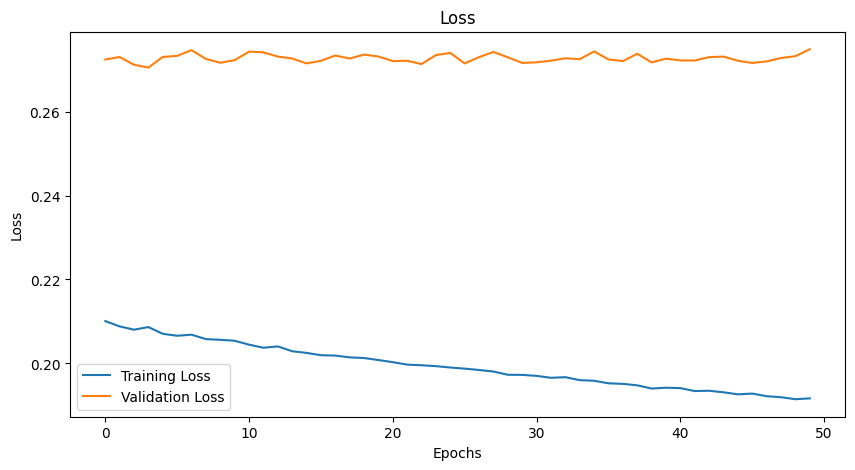

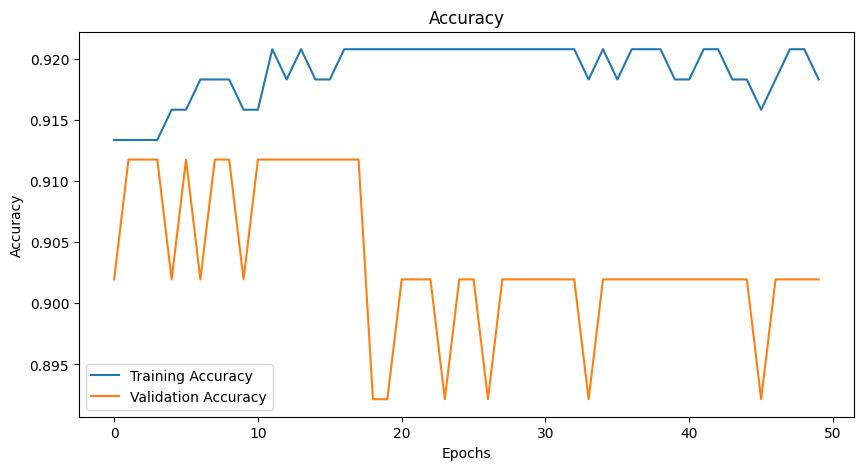

In [ ]:
# 손실 그래프
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# 정확도 그래프
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()